# Import necessary libraries

In [1]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Inference using pretrained detection model

In [2]:
def verify_file_exists(file_path):
    # Check if the file exists
    if os.path.isfile(file_path):
        print(f"The file '{file_path}' exists.")
    else:
        print(f"The file '{file_path}' does not exist.")

def list_images(directory_path):
    # Define possible image file extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif'}
    
    # List comprehension to filter image files
    images = [os.path.join(directory_path, file) for file in os.listdir(directory_path)
              if os.path.splitext(file)[1].lower() in image_extensions]
    
    return images

model_path = "../../Models/pretrained-yolov8-soccer.pt"
images_dir_path = "../../Datasets/object detection images"
image_paths_list = list_images(images_dir_path)

verify_file_exists(model_path)

The file '../../Models/pretrained-yolov8-soccer.pt' exists.


In [3]:
# Load pretrained yolo model
model = YOLO(model_path)

# Run inference over all test images
results = model(source=image_paths_list, show=False, conf=0.4, save=False)


0: 480x800 1 goalkeeper, 1 referee, 15 soccer-players, 1: 480x800 1 goalkeeper, 10 soccer-players, 2: 480x800 1 goalkeeper, 8 soccer-players, 3: 480x800 1 goalkeeper, 12 soccer-players, 176.0ms
Speed: 26.4ms preprocess, 44.0ms inference, 15.3ms postprocess per image at shape (1, 3, 480, 800)


# Displaying the results

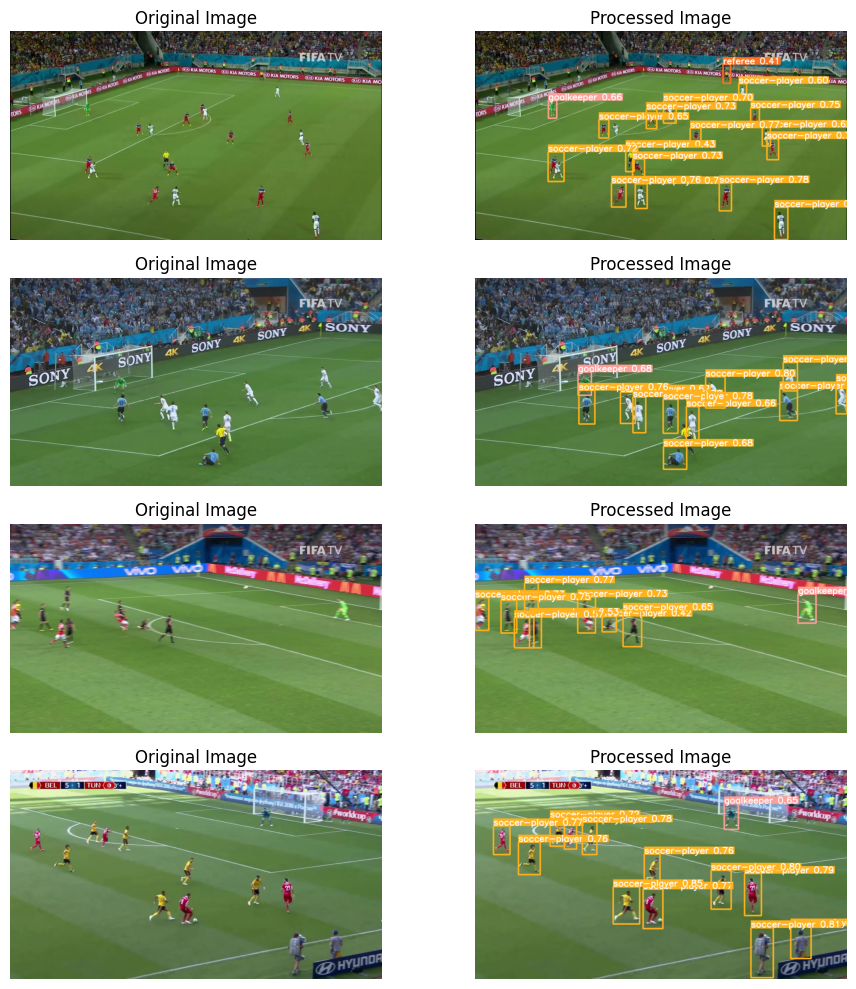

In [4]:
def convert_bgr_to_rgb(image):
    """Convert an image from BGR to RGB format."""
    return image[..., ::-1]

def plot_images_side_by_side(results):
    """Plot original and processed images side by side."""
    num_images = len(results)
    num_columns = 2  # Original and processed images
    num_rows = num_images
    
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(10, num_rows * 2.5))
    
    # Ensure axs is always a 2D array for consistency
    axs = axs.reshape(num_rows, num_columns)
    
    for idx, result in enumerate(results):
        # Plot original image
        orig_img_rgb = convert_bgr_to_rgb(result.orig_img)
        axs[idx, 0].imshow(orig_img_rgb)
        axs[idx, 0].set_title('Original Image')
        axs[idx, 0].axis('off')
        
        # Plot processed image
        processed_img_bgr = result.plot()  # Assuming this method returns a BGR numpy array
        processed_img_rgb = convert_bgr_to_rgb(processed_img_bgr)
        axs[idx, 1].imshow(processed_img_rgb)
        axs[idx, 1].set_title('Processed Image')
        axs[idx, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Now, simply call the function with your results
plot_images_side_by_side(results)